In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler

df = pd.read_csv('../all_var_int.csv')
df.describe()

,FID_Key,state_code,district_code,block_code,objectid,stcode11,drought_frq,storm_freq,flood_freq,rural_pop,...,total_reg_workers,women_reg_workers,num_of_active_job_cards,num_joint_acc_of_women,num_total_acc_of_women,num_women_beneficiary_worker_with_acc,num_women_beneficiary_active_worker_with_acc,tot_expenditure,tot_mandays,gw_stge_of_extraction
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5175.000000
mean,3744.730181,19.342218,362.509028,3424.578504,3459.751849,19.834910,3.081169,11.045572,22.271883,4.268809e+06,...,41076.712468,19873.782287,12602.858469,2408.266724,16449.579536,15557.887360,10773.214961,4319.087704,6.884994e+07,-456.060553
std,1998.031178,9.939108,195.339992,1951.511798,2106.574036,10.560126,2.103926,9.441698,14.123303,3.745933e+06,...,34379.827770,16262.322561,9007.231548,5387.560594,13534.272569,12013.081666,9030.064504,4116.178693,7.488405e+07,6975.643425
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-100000.000000
25%,1976.500000,9.000000,192.000000,1709.500000,1566.500000,9.000000,2.000000,3.000000,13.000000,1.569976e+06,...,19194.500000,9094.000000,6537.000000,120.000000,7428.500000,7527.000000,4787.000000,1477.500000,2.053185e+07,32.974058
50%,3670.000000,20.000000,356.000000,3408.000000,3289.000000,20.000000,3.000000,7.000000,21.000000,3.293788e+06,...,30669.000000,15226.000000,10218.000000,551.000000,12281.000000,12078.000000,8107.000000,3172.000000,4.624726e+07,56.728903
75%,5519.500000,27.000000,517.000000,5085.500000,5394.500000,27.000000,5.000000,20.000000,32.000000,6.076031e+06,...,51225.500000,25712.000000,16414.000000,2025.500000,21535.000000,20399.000000,13925.500000,5798.500000,9.129770e+07,76.093358
max,7133.000000,38.000000,734.000000,7417.000000,7136.000000,39.000000,8.000000,38.000000,60.000000,3.173207e+07,...,359381.000000,158219.000000,78340.000000,75184.000000,120982.000000,97587.000000,82105.000000,55644.000000,1.021685e+09,474.955968


In [2]:
infra = ['vill_all_weather_road', 'pop_all_weather_road','num_vill_no_elec','num_vill_elec_1_4_hrs', 'num_vill_elec_4_8_hrs', 'num_vill_elec_8_12_hrs', 'num_vill_elec_mt_12_hrs','total_vill_rain_water_harvesting_system','tot_area_irrigated','avg_trvl_1', 'avg_trvl_2','avg_trvl_3','avg_trvl_4','avg_trvl_5','avg_trvl_6','avg_trvl_7','avg_trvl_8','avg_trvl_9','cisi','total_rad']
Institutional_Capacity = ['bc_cnt', 'branch_cnt' , 'bcrural', 'branch_rur','total_bc_w_internet','total_shgs', 'total_hhs_mobilizedinto_pgs', 'total_shgs_accessed_bank_loans', 'total_shg_loan_amount', 'tot_expenditure', 'tot_mandays','num_jobcards_applied', 'num_jobcards_issued', 'num_of_active_job_cards' ,'total_reg_workers', 'women_reg_workers', 'num_joint_acc_of_women', 'num_total_acc_of_women', 'num_women_beneficiary_worker_with_acc', 'num_women_beneficiary_active_worker_with_acc','hhs_availing_benefits_PMUY','hh_non_farm_activities']
common_cols = ["block_code", "FID_Key", "total_villages", "geog_area"]


In [3]:
flood_df = df[common_cols+Institutional_Capacity+infra]

In [4]:
flood_df.loc[df['total_villages'].isna(), 'total_villages'] = 74

inverting variable which are negatively corelated

'high' == AC --> low
'high' --> AC-->high

In [5]:
flood_df['num_vill_no_elec'] = -flood_df['num_vill_no_elec']
for col in ['avg_trvl_1', 'avg_trvl_2','avg_trvl_3','avg_trvl_4','avg_trvl_5','avg_trvl_6','avg_trvl_7','avg_trvl_8','avg_trvl_9']:
    # flood_df[col] = -flood_df[col]
    flood_df[col] = 1/(1+flood_df[col])




/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_13069/364922609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_df['num_vill_no_elec'] = -flood_df['num_vill_no_elec']
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_13069/364922609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_df[col] = 1/(1+flood_df[col])


normalization

In [6]:
flood_df['cisi'].describe()

count    5545.000000
mean        0.027631
std         0.025717
min         0.000000
25%         0.009714
50%         0.020544
75%         0.037573
max         0.245623
Name: cisi, dtype: float64

In [7]:
flood_df.columns


Index(['block_code', 'FID_Key', 'total_villages', 'geog_area', 'bc_cnt',
       'branch_cnt', 'bcrural', 'branch_rur', 'total_bc_w_internet',
       'total_shgs', 'total_hhs_mobilizedinto_pgs',
       'total_shgs_accessed_bank_loans', 'total_shg_loan_amount',
       'tot_expenditure', 'tot_mandays', 'num_jobcards_applied',
       'num_jobcards_issued', 'num_of_active_job_cards', 'total_reg_workers',
       'women_reg_workers', 'num_joint_acc_of_women', 'num_total_acc_of_women',
       'num_women_beneficiary_worker_with_acc',
       'num_women_beneficiary_active_worker_with_acc',
       'hhs_availing_benefits_PMUY', 'hh_non_farm_activities',
       'vill_all_weather_road', 'pop_all_weather_road', 'num_vill_no_elec',
       'num_vill_elec_1_4_hrs', 'num_vill_elec_4_8_hrs',
       'num_vill_elec_8_12_hrs', 'num_vill_elec_mt_12_hrs',
       'total_vill_rain_water_harvesting_system', 'tot_area_irrigated',
       'avg_trvl_1', 'avg_trvl_2', 'avg_trvl_3', 'avg_trvl_4', 'avg_trvl_5',
       'a

In [8]:
scaling_col = ['bc_cnt', 'branch_cnt', 'bcrural', 'branch_rur', 'total_bc_w_internet',
       'total_shgs', 'total_hhs_mobilizedinto_pgs',
       'total_shgs_accessed_bank_loans', 'total_shg_loan_amount',
       'tot_expenditure', 'tot_mandays', 'num_jobcards_applied',
       'num_jobcards_issued', 'num_of_active_job_cards', 'total_reg_workers',
       'women_reg_workers', 'num_joint_acc_of_women', 'num_total_acc_of_women',
       'num_women_beneficiary_worker_with_acc',
       'num_women_beneficiary_active_worker_with_acc',
       'hhs_availing_benefits_PMUY', 'hh_non_farm_activities',
       'vill_all_weather_road', 'pop_all_weather_road', 'num_vill_no_elec',
       'num_vill_elec_1_4_hrs', 'num_vill_elec_4_8_hrs',
       'num_vill_elec_8_12_hrs', 'num_vill_elec_mt_12_hrs',
       'total_vill_rain_water_harvesting_system', 'tot_area_irrigated',
       'avg_trvl_1', 'avg_trvl_2', 'avg_trvl_3', 'avg_trvl_4', 'avg_trvl_5',
       'avg_trvl_6', 'avg_trvl_7', 'avg_trvl_8', 'avg_trvl_9',
       'total_rad']

scaler = RobustScaler()

df_scaled = flood_df.copy()

df_scaled[scaling_col] = scaler.fit_transform(df_scaled[scaling_col])

In [9]:
df_scaled.isna().sum()

block_code                                        0
FID_Key                                           0
total_villages                                    0
geog_area                                         0
bc_cnt                                            0
branch_cnt                                        0
bcrural                                           0
branch_rur                                        0
total_bc_w_internet                               0
total_shgs                                        0
total_hhs_mobilizedinto_pgs                       0
total_shgs_accessed_bank_loans                    0
total_shg_loan_amount                             0
tot_expenditure                                   0
tot_mandays                                       0
num_jobcards_applied                              0
num_jobcards_issued                               0
num_of_active_job_cards                           0
total_reg_workers                                 0
women_reg_wo

fillinf missing values in cisi with 0

In [10]:
df_scaled['cisi'].fillna(0, inplace=True)

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_13069/474801310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_scaled['cisi'].fillna(0, inplace=True)


In [11]:
df_pca = df_scaled.drop(columns=['block_code', 'FID_Key','total_villages', 'geog_area','avg_trvl_1', 'avg_trvl_2', 'avg_trvl_3', 'avg_trvl_4', 'avg_trvl_5',
       'avg_trvl_6', 'avg_trvl_8', 'avg_trvl_9'],errors='ignore')
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca)

PCA()

In [12]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)

,% variance,Cumulative %
0,0.261,0.261
1,0.195,0.457
2,0.152,0.609
3,0.123,0.731
4,0.069,0.800
5,0.038,0.838
6,0.030,0.868
7,0.025,0.893
8,0.018,0.910
9,0.015,0.925


In [13]:
PCA_weights = pcaSummary_df['% variance'][:9]

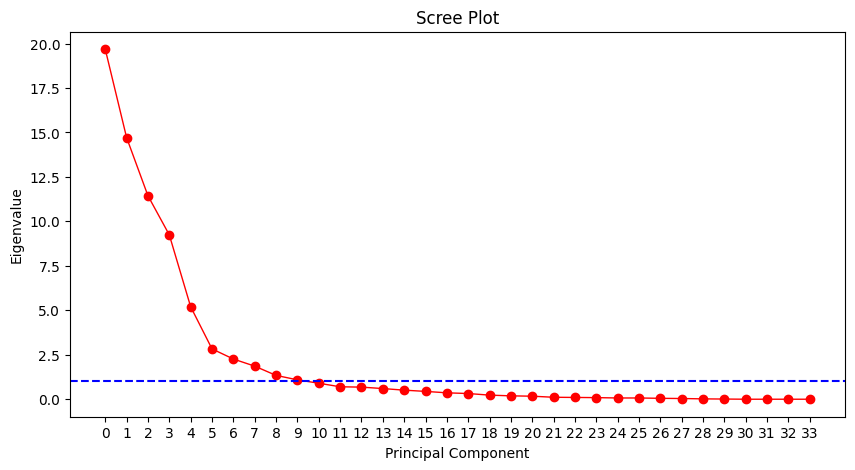

In [14]:
import matplotlib.pyplot as plt

# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [15]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=9)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(9)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                                                   PC1       PC2       PC3  \
bc_cnt                                       -0.008876  0.202677  0.005553   
branch_cnt                                   -0.083925  0.637334 -0.242762   
bcrural                                       0.006325  0.106756  0.055525   
branch_rur                                   -0.083925  0.637334 -0.242762   
total_bc_w_internet                           0.014252  0.073871  0.088157   
total_shgs                                    0.026932  0.050428  0.108635   
total_hhs_mobilizedinto_pgs                   0.009570  0.036850  0.101449   
total_shgs_accessed_bank_loans                0.000726  0.027702  0.075509   
total_shg_loan_amount                        -0.009418  0.024716  0.104147   
tot_expenditure                               0.044232  0.049299  0.163846   
tot_mandays                                   0.037279  0.053001  0.166307   
num_jobcards_applied                          0.040975  0.060158

In [16]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Flood_AdaptiveCapacity_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   block_code  FID_Key  total_villages   geog_area    bc_cnt  branch_cnt  \
0        6498        1             7.0  1199.52279 -0.594595   -0.666667   
1        6492        4            82.0  1505.90407 -0.594595   -0.533333   
2        4689       56            30.0   290.78289  0.986486    4.666667   
3        4690       57            17.0   294.23585 -0.486486   -0.466667   
4        4692       58            19.0   339.99146 -0.310811   -0.400000   

    bcrural  branch_rur  total_bc_w_internet  total_shgs  ...  total_rad  \
0 -0.606061   -0.666667            -0.631579   -0.821965  ...   3.085754   
1 -0.606061   -0.533333            -0.526316   -0.622909  ...   3.161954   
2  0.151515    4.666667            -0.315789    2.422994  ...   0.321142   
3 -0.500000   -0.466667            -0.684211    0.561991  ...   0.308859   
4 -0.287879   -0.400000            -0.526316    0.096096  ...   0.251684   

   Flood_AdaptiveCapacity_PC1  Flood_AdaptiveCapacity_PC2  \
0                   -2.37

In [18]:
# Multiply each PCA component score by its weight
df["Flood_AdaptiveCapacity_Index"] = (
    PCA_weights[0] * df_scaled["Flood_AdaptiveCapacity_PC1"] +
    PCA_weights[1] * df_scaled["Flood_AdaptiveCapacity_PC2"] +
    PCA_weights[2] * df_scaled["Flood_AdaptiveCapacity_PC3"] +
    PCA_weights[3] * df_scaled["Flood_AdaptiveCapacity_PC4"] +
    PCA_weights[4] * df_scaled["Flood_AdaptiveCapacity_PC5"] +
    PCA_weights[5] * df_scaled["Flood_AdaptiveCapacity_PC6"] +
    PCA_weights[6] * df_scaled["Flood_AdaptiveCapacity_PC7"] +
    PCA_weights[7] * df_scaled["Flood_AdaptiveCapacity_PC8"] 
)

# Display the flood_exposure Index
print(df[["block_code", "Flood_AdaptiveCapacity_Index"]].head())

   block_code  Flood_AdaptiveCapacity_Index
0        6498                     -1.524188
1        6492                     -1.329238
2        4689                     -0.095820
3        4690                     -1.137671
4        4692                     -1.237547
